<div dir="auto">

# تحلیل آماری نتایج دور اول انتخابات 1403 ایران به تفکیک استان
#### منابع استخراج آمار:
- [آمار و اطلاعات تفکیکی انتخابات چهاردهمین دوره ریاست جمهوری (مرحله اول)](https://moi.ir/x423c)
</div>

In [21]:
# import needed madules

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [22]:
# read the dataset

data = pd.read_csv('first_round_data.csv')
data.head()

,Province,Invalid,Valid,Pezeshkian,Pouermohamadi,Jalili,Qalibaf
0,East Azerbaijan,26237,1375871,1067087,7033,244369,57382
1,West Azerbaijan,22530,1016820,806435,4577,146436,59372
2,Ardabil,10024,494578,382647,2676,72878,36377
3,Isfahan,77715,1453032,428098,16524,868431,139979
4,Alborz,27774,674263,300040,6868,260197,107158


In [23]:
# To use Arabic and Persian in Jupyter notebook

import arabic_reshaper
from bidi.algorithm import get_display

def show_persian_correct(text: 'str'):
    reshaped_text = arabic_reshaper.reshape(text)
    bidi_text = get_display(reshaped_text)
    return bidi_text

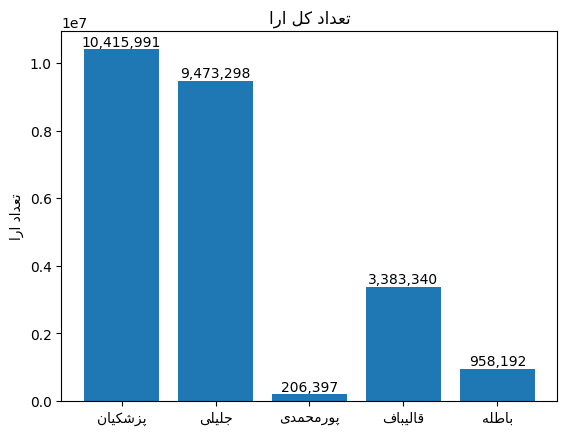

In [24]:
names = [
    show_persian_correct("پزشکیان"), show_persian_correct("جلیلی"), show_persian_correct("پورمحمدی"), show_persian_correct("قالیباف"), show_persian_correct("باطله")
]
counts = [data.Pezeshkian.sum(), data.Jalili.sum(), data.Pouermohamadi.sum(), data.Qalibaf.sum(), data.Invalid.sum()]

fig, ax = plt.subplots()
bar_container = ax.bar(names, counts)
ax.set(ylabel=show_persian_correct("تعداد ارا"), title=show_persian_correct("تعداد کل ارا"))
ax.bar_label(bar_container, fmt='{:,.0f}')
plt.show()

<div dir="auto">

# قانون بنفورد
قانون بنفورد، یک قانون ریاضی است که توزیع ارقام اول مجموعه‌ای از داده‌های عددی را توصیف می‌کند. طبق این قانون، در بسیاری از مجموعه‌های داده‌های طبیعی، رقم اول به احتمال بیشتری کوچک است. به طور مشخص، رقم 1 به عنوان رقم اول با احتمال تقریبی 30% ظاهر می‌شود، در حالی که رقم 9 فقط با احتمال حدود 5% ظاهر می‌شود.

### کاربردهای قانون بنفورد:

1. تشخیص تقلب در داده‌ها: قانون بنفورد به طور گسترده‌ای برای تشخیص تقلب در داده‌های مالی، انتخابات، و سایر مجموعه‌های داده‌ای که انتظار می‌رود توزیع طبیعی داشته باشند، استفاده می‌شود. اگر توزیع ارقام اول در یک مجموعه داده با توزیع پیش‌بینی شده توسط قانون بنفورد تفاوت قابل توجهی داشته باشد، ممکن است نشان‌دهنده وجود تقلب یا دستکاری باشد.

2. حسابرسی مالی: حسابرسان از قانون بنفورد برای تحلیل داده‌های حسابداری و مالی استفاده می‌کنند. اگر ارقام اول در داده‌های حسابداری با توزیع بنفورد مطابقت نداشته باشد، این می‌تواند نشانه‌ای از وجود خطا یا تقلب باشد.

### توزیع ارقام اول طبق قانون بنفورد:

- رقم 1: حدود 30.1%
- رقم 2: حدود 17.6%
- رقم 3: حدود 12.5%
- رقم 4: حدود 9.7%
- رقم 5: حدود 7.9%
- رقم 6: حدود 6.7%
- رقم 7: حدود 5.8%
- رقم 8: حدود 5.1%
- رقم 9: حدود 4.6%
</div>

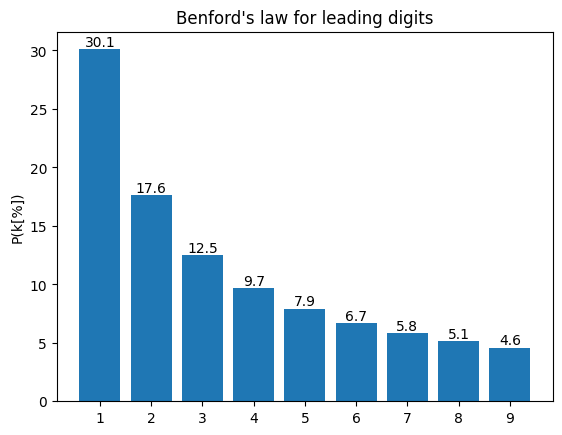

In [25]:
digits = np.arange(1, 10)
benford_probs = np.array([np.log10(1 + 1 / d) * 100 for d in range(1, 10)])

fig, ax = plt.subplots()
bar_container = ax.bar(digits, benford_probs)
ax.set(ylabel="P(k[%])", title="Benford's law for leading digits")
ax.set_xticks(digits)
ax.bar_label(bar_container, fmt='{:,.1f}')
plt.show()

<div dir="auto">

## محاسبه توزیع بنفورد برای ارا
</div>

In [26]:
from collections import Counter


def first_digit(num: 'int'):
    while num > 9:
        num //= 10
    return num


def benford_distribution(array: 'list') -> 'dict':
    first_digits = [first_digit(i) for i in array]
    counter = Counter(first_digits)
    total_count = sum(counter.values())
    percentages = {key: (counter.get(key, 0) / total_count) * 100 for key in digits}
    return percentages

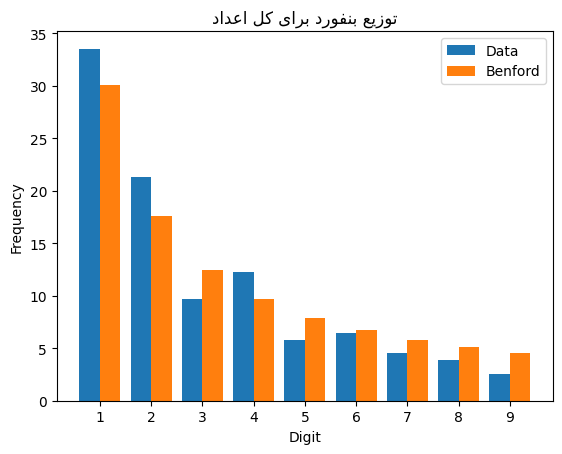

In [27]:
all_data = np.concatenate((
    np.array(data.Pezeshkian),
    np.array(data.Jalili),
    np.array(data.Pouermohamadi),
    np.array(data.Qalibaf),
    np.array(data.Invalid)
))

percentages = benford_distribution(all_data)
fig, ax = plt.subplots()
ax.bar(digits - 0.2, percentages.values(), 0.4, label='Data')
ax.bar(digits + 0.2, benford_probs, 0.4, label='Benford')
ax.set_xlabel('Digit')
ax.set_ylabel('Frequency')
ax.set_xticks(digits)
ax.set_xticklabels(digits)
ax.set_title(show_persian_correct("توزیع بنفورد برای کل اعداد"))
ax.legend()
plt.show()

<div dir="auto">
    
# محاسبه توزیع بنفورد برای رقم دوم ارا
#### برای بررسی جامع‌تر داده‌های انتخاباتی، می‌توانیم هر دو رقم اول و دوم را بررسی کنید. این کار می‌تواند به شناسایی ناهنجاری‌های بزرگ و کوچک کمک کند.


### توزیع ارقام دوم طبق قانون بنفورد:
- رقم 0: حدود 12.0%
- رقم 1: حدود 11.4%
- رقم 2: حدود 10.9%
- رقم 3: حدود 10.4%
- رقم 4: حدود 10.0%
- رقم 5: حدود 9.7%
- رقم 6: حدود 9.3%
- رقم 7: حدود 9.0%
- رقم 8: حدود 8.8%
- رقم 9: حدود 8.5%
</div>

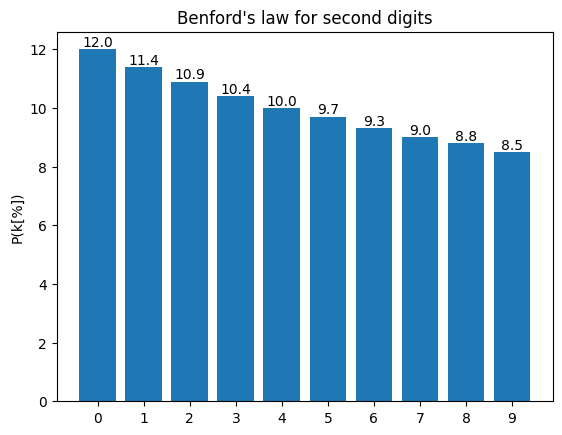

In [28]:
digits = np.arange(0, 10)
benford_second_digit_probs = np.array((12, 11.4, 10.9, 10.4, 10, 9.7, 9.3, 9, 8.8, 8.5))

fig, ax = plt.subplots()
bar_container = ax.bar(digits, benford_second_digit_probs)
ax.set(ylabel="P(k[%])", title="Benford's law for second digits")
ax.set_xticks(digits)
ax.bar_label(bar_container, fmt='{:,.1f}')
plt.show()

In [29]:
def second_digit(num: 'int'):
    while num > 100:
        num //= 10
    return num % 10
    

def benford_second_digit_distribution(array: 'list') -> 'dict':
    second_digits = [second_digit(i) for i in array]
    counter = Counter(second_digits)
    total_count = sum(counter.values())
    percentages = {key: (counter.get(key, 0) / total_count) * 100 for key in digits}
    return percentages

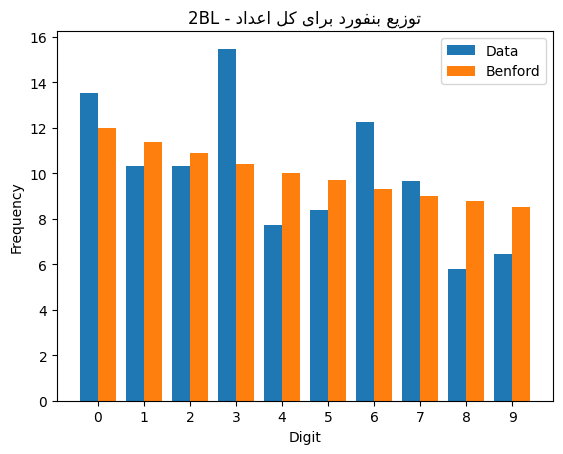

In [30]:
percentages = benford_second_digit_distribution(all_data)
fig, ax = plt.subplots()
ax.bar(digits - 0.2, percentages.values(), 0.4, label='Data')
ax.bar(digits + 0.2, benford_second_digit_probs, 0.4, label='Benford')
ax.set_xlabel('Digit')
ax.set_ylabel('Frequency')
ax.set_xticks(digits)
ax.set_xticklabels(digits)
ax.set_title(show_persian_correct("2BL - توزیع بنفورد برای کل اعداد"))
ax.legend()
plt.show()

<div dir="auto">

## توزیع بنفورد برای تعداد ارا انتخابات 2020 امریکا جهت مقایسه
[منبع](https://github.com/cjph8914/2020_benfords)
</div>

![Fulton County, GA](images/1.png)
![Miami-Dade, FL](images/2.png)
![Milwaukee, WI](images/3.png)
![Chicago, IL](images/4.png)
![Allegheny, PA](images/5.png)